## Author Identification Algorithm: Decision Trees vs Random Forest
### Feature Engineering Approach: Word and Character based Feature Extraction

Notebook Programmers: <br>
Rommel Urbano Jr. <br>
Joshua Paulino <br>
Jeffrey Ajero <br>

In [1]:
import base64
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import re

# Other imports
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
%matplotlib inline
%matplotlib notebook

In [2]:
train=pd.read_csv('C:/Users/Asus/Desktop/train.csv')
train=train.iloc[:,[1,2]]

In [3]:
print(train.shape)
train.head()

(19579, 2)


,text,author
0,"This process, however, afforded me no means of...",EAP
1,It never once occurred to me that the fumbling...,HPL
2,"In his left hand was a gold snuff box, from wh...",EAP
3,How lovely is spring As we looked from Windsor...,MWS
4,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}
data = [go.Bar(
            x = train.author.map(z).unique(),
            y = train.author.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = train.author.value_counts().values
                        ),
            text='Text entries attributed to Author'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [5]:
import string
def unique_word_fraction(row):
    """function to calculate the fraction of unique words on total words of the text"""
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    unique_count = list(set(text_splited)).__len__()
    return (unique_count/word_count)


eng_stopwords = set(stopwords.words("english"))
def stopwords_count(row):
    """ Number of stopwords fraction in a text"""
    text = row['text'].lower()
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    stopwords_count = len([w for w in text_splited if w in eng_stopwords])
    return (stopwords_count/word_count)


def punctuations_fraction(row):
    """functiopn to claculate the fraction of punctuations over total number of characters for a given text """
    text = row['text']
    char_count = len(text)
    punctuation_count = len([c for c in text if c in string.punctuation])
    return (punctuation_count/char_count)


def char_count(row):
    """function to return number of characters """
    return len(row['text'])

def fraction_noun(row):
    """function to give us fraction of noun over total words """
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    pos_list = nltk.pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    return (noun_count/word_count)

def fraction_adj(row):
    """function to give us fraction of adjectives over total words in given text"""
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    pos_list = nltk.pos_tag(text_splited)
    adj_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    return (adj_count/word_count)

def fraction_verbs(row):
    """function to give us fraction of verbs over total words in given text"""
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    pos_list = nltk.pos_tag(text_splited)
    verbs_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    return (verbs_count/word_count)

def lowercase(value):
    value = str(value)
    return value.lower()

def count_word_in_sentence(x):
    word_list = x['text'].split(' ')
    return len(word_list)

def count_word_in_clean_sentence(stop_words,train):
    word_tokens = word_tokenize(train['text']) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return len(filtered_sentence)

def convert_label(v):
    if v == 'EAP':
        return 0
    elif v == 'HPL':
        return 1
    elif v == 'MWS':
        return 2
    
def determine_past_tense_input(row):
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    tagged = nltk.pos_tag(text_splited)
    word_count = text_splited.__len__()
    past_tense_count = len([word for word in tagged if word[1] in ["VBD", "VBN"]]) 
    return(past_tense_count/word_count)

def determine_present_tense_input(row):
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    tagged = nltk.pos_tag(text_splited)
    word_count = text_splited.__len__()
    present_tense_count = len([word for word in tagged if word[1] in ["VBP", "VBZ","VBG"]])
    return(present_tense_count/word_count)

def determine_future_tense_input(row):
    text = row['text']
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    tagged = nltk.pos_tag(text_splited)
    word_count = text_splited.__len__()
    future_tense_count = len([word for word in tagged if word[1] == ["VBC", "VBF"]])
    return(future_tense_count/word_count)

def count_sentences(x):
    word_list = x['text'].split('.')
    return len(word_list)-1

def count_dots(x):
    word_list = x['text'].count('.')
    return word_list

def count_commas(x):
    word_list = x['text'].count(',')
    return word_list

def count_semicolon(x):
    word_list = x['text'].count(';')
    return word_list

def count_colon(x):
    word_list = x['text'].count(':')
    return word_list

def count_exclamation(x):
    word_list = x['text'].count('!')
    return word_list

def count_questionmark(x):
    word_list = x['text'].count('?')
    return word_list

In [6]:
train['text'] = train.apply(lambda x: lowercase(x), axis=1)
train['number_of_words_before_clean'] = train.apply(lambda x: count_word_in_sentence(x),axis=1)
train['unique_word_fraction'] = train.apply(lambda row: unique_word_fraction(row), axis =1)
train['stopwords_count'] = train.apply(lambda row: stopwords_count(row), axis =1)
train['punctuations_fraction'] = train.apply(lambda row: punctuations_fraction(row), axis =1)
train['char_count'] = train.apply(lambda row: char_count(row), axis =1)
train['fraction_noun'] = train.apply(lambda row: fraction_noun(row), axis =1)
train['fraction_adj'] = train.apply(lambda row: fraction_adj(row), axis =1)
train['fraction_verbs'] = train.apply(lambda row: fraction_verbs(row), axis =1)
train['past_tenses'] = train.apply(lambda row: determine_past_tense_input(row), axis =1)
train['present_tenses'] = train.apply(lambda row: determine_present_tense_input(row), axis =1)
train['future_tenses'] = train.apply(lambda row: determine_future_tense_input(row), axis =1)
train['sentence_count'] = train.apply(lambda row: count_sentences(row), axis =1)
train['count_period'] = train.apply(lambda row: count_dots(row), axis =1)
train['count_commas'] = train.apply(lambda row: count_commas(row), axis =1)
train['count_semicolon'] = train.apply(lambda row: count_semicolon(row), axis =1)
train['count_colon'] = train.apply(lambda row: count_colon(row), axis =1)
train['count_exclamation'] = train.apply(lambda row: count_exclamation(row), axis =1)
train['count_questionmark'] = train.apply(lambda row: count_questionmark(row), axis =1)
train['author'] = train.apply(lambda x: convert_label(x['author']), axis=1)

for i in range(0,len(train['text'])):
    train['text'][i]=re.sub('([^A-Za-z\'\ ])','',train['text'][i])

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english')) 

train['number_of_words_after_clean'] = train.apply(lambda x: count_word_in_clean_sentence(stop_words,x),axis=1)

<ipython-input-6-d1370ab50b09>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
train.head(10)

,text,author,number_of_words_before_clean,unique_word_fraction,stopwords_count,punctuations_fraction,char_count,fraction_noun,fraction_adj,fraction_verbs,...,present_tenses,future_tenses,sentence_count,count_period,count_commas,count_semicolon,count_colon,count_exclamation,count_questionmark,number_of_words_after_clean
0,text this process however afforded me no ...,0,67,1.0,0.230769,0.056338,142,0.384615,0.076923,0.153846,...,0.076923,0.0,3,3,3,0,2,0,0,9
1,text it never once occurred to me that th...,1,68,1.0,0.428571,0.042254,142,0.357143,0.000000,0.071429,...,0.000000,0.0,3,3,1,0,2,0,0,7
2,text in his left hand was a gold snuff bo...,0,70,1.0,0.312500,0.049296,142,0.500000,0.125000,0.062500,...,0.000000,0.0,3,3,2,0,2,0,0,10
3,text how lovely is spring as we looked fr...,2,68,1.0,0.357143,0.042254,142,0.285714,0.071429,0.285714,...,0.142857,0.0,3,3,1,0,2,0,0,8
4,text finding nothing else not even gold t...,1,67,1.0,0.153846,0.056338,142,0.461538,0.000000,0.153846,...,0.076923,0.0,3,3,3,0,2,0,0,10
5,text a youth passed in solitude my best y...,2,68,1.0,0.214286,0.049296,142,0.357143,0.071429,0.142857,...,0.071429,0.0,3,3,2,0,2,0,0,10
6,text the astronomer perhaps at this point...,0,67,1.0,0.230769,0.063380,142,0.461538,0.000000,0.076923,...,0.000000,0.0,3,3,4,0,2,0,0,9
7,text the surcingle hung in ribands from m...,0,61,1.0,0.307692,0.030769,130,0.538462,0.000000,0.000000,...,0.000000,0.0,1,1,1,0,2,0,0,8
8,text i knew that you could not say to you...,0,69,1.0,0.400000,0.049296,142,0.266667,0.066667,0.200000,...,0.000000,0.0,3,3,1,0,2,0,0,8
9,text i confess that neither the structure...,2,67,1.0,0.307692,0.042254,142,0.538462,0.000000,0.076923,...,0.076923,0.0,3,3,1,0,2,0,0,8


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PolynomialFeatures


X= pd.DataFrame(train[['number_of_words_before_clean','unique_word_fraction','stopwords_count','punctuations_fraction',
                       'char_count','fraction_noun','fraction_adj','fraction_verbs','past_tenses','present_tenses',
                       'future_tenses','sentence_count','count_period','number_of_words_after_clean']])
y= pd.DataFrame(train['author'])

In [9]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
print(p_values)
# High P-value, more Independent towards the Target Variable, which means less relevant to the Target Variable
X=X.drop(['unique_word_fraction', 'punctuations_fraction', 'number_of_words_after_clean','future_tenses','fraction_noun'], axis=1)

unique_word_fraction            9.912913e-01
punctuations_fraction           9.105169e-01
fraction_noun                   6.057230e-01
fraction_verbs                  4.574489e-01
fraction_adj                    3.058130e-01
stopwords_count                 2.807130e-01
past_tenses                     4.519734e-04
present_tenses                  5.749365e-05
count_period                    1.159722e-10
sentence_count                  1.159722e-10
number_of_words_after_clean     9.889017e-15
number_of_words_before_clean    1.081900e-24
char_count                      2.370021e-30
future_tenses                            NaN
dtype: float64


In [10]:
X.head(10)

,number_of_words_before_clean,stopwords_count,char_count,fraction_adj,fraction_verbs,past_tenses,present_tenses,sentence_count,count_period
0,67,0.230769,142,0.076923,0.153846,0.076923,0.076923,3,3
1,68,0.428571,142,0.000000,0.071429,0.071429,0.000000,3,3
2,70,0.312500,142,0.125000,0.062500,0.062500,0.000000,3,3
3,68,0.357143,142,0.071429,0.285714,0.071429,0.142857,3,3
4,67,0.153846,142,0.000000,0.153846,0.000000,0.076923,3,3
5,68,0.214286,142,0.071429,0.142857,0.071429,0.071429,3,3
6,67,0.230769,142,0.000000,0.076923,0.076923,0.000000,3,3
7,61,0.307692,130,0.000000,0.000000,0.000000,0.000000,1,1
8,69,0.400000,142,0.066667,0.200000,0.066667,0.000000,3,3
9,67,0.307692,142,0.000000,0.076923,0.000000,0.076923,3,3


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<IPython.core.display.Javascript object>


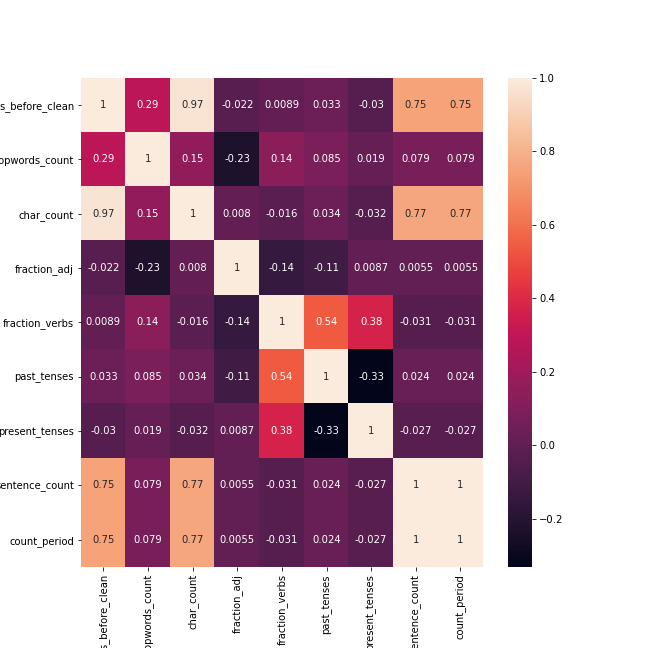

<IPython.core.display.Javascript object>


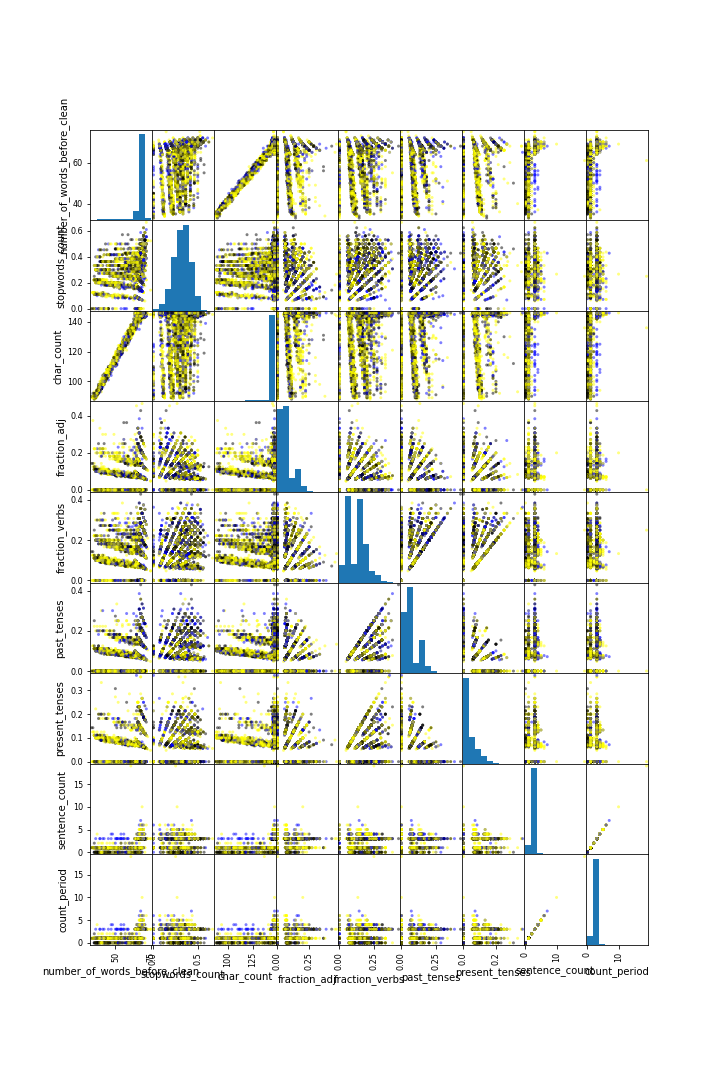

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure(figsize=(9, 9))
correlation = X.corr()
heatmap = sns.heatmap(correlation, annot=True)
plt.show()

cmap=cmap_bold
temp=pd.DataFrame(X)
scatter=pd.plotting.scatter_matrix(temp,c=train['author'],figsize=(10,15),cmap=cmap)


In [14]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=6)
tree.fit(X_train_scaled,y_train)
print(tree.score(X_train_scaled,y_train))
print(tree.score(X_test_scaled,y_test))

0.44109234540997005
0.42880490296220636


In [30]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100,oob_score=True,max_depth=6,random_state=0)
rand_forest.fit(X_train_scaled, y_train)
print(rand_forest.score(X_train_scaled,y_train))
print(rand_forest.score(X_test_scaled,y_test))

<ipython-input-30-881d87a8ed42>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.45049032961046037
0.43615934627170583


In [16]:
from sklearn.svm import LinearSVC
lin_svm = LinearSVC(penalty='l2',dual=False)
lin_svm.fit(X_train_scaled,y_train)
print(lin_svm.score(X_train_scaled,y_train))
print(lin_svm.score(X_test_scaled,y_test))

0.42611005175701444
0.42880490296220636


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [17]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train_scaled, y_train)
print(mnb.score(X_train_scaled,y_train))
print(mnb.score(X_test_scaled,y_test))

0.4018659765731408
0.4083758937691522


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [22]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=215)
neigh.fit(X_train_scaled, y_train)
print(neigh.score(X_train_scaled,y_train))
print(neigh.score(X_test_scaled,y_test))

<ipython-input-22-1fd9f0189e38>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.44694906020157993
0.4275791624106231


In [25]:
from sklearn.svm import SVC
poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_train_scaled, y_train)
print(poly_svm.score(X_train_scaled,y_train))
print(poly_svm.score(X_test_scaled,y_test))

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.4361890493053664
0.43881511746680285


In [37]:
from sklearn.ensemble import StackingClassifier
estimators = [
     ('lin_svc', LinearSVC()),
     ('mnb', MultinomialNB()),
     ('kNN', KNeighborsClassifier(n_neighbors=215))
]
stack = StackingClassifier(
     estimators=estimators, final_estimator=LinearSVC()
)

stack.fit(X_train_scaled,y_train)
print(stack.score(X_train,y_train))
print(stack.score(X_test,y_test))

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.4017978752383547
0.40817160367722166
